### Necessary packages import

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import re
import warnings
from functools import reduce

#### SCRIPT TO IGNORE WARNINGS

In [2]:
warnings.filterwarnings('ignore')
warnings.simplefilter('ignore')
warnings.filterwarnings(action='once')

## ETL PIPELINE FUNCTION:

This function converts your raw data, containing ceratin features as columns, into a refined form for further processing

In [3]:
#ETL-> extract, Transform & Load Pipeline 
# This function will read the input dataframe and perform some necessary functions:
# 1. Dropping rows with null values
# 2. Converting dates/times column to date_time format under column name "Date"
# 3. Remove the percentage symbols from the values of column(like Change% etc.) to make if float[for calculations]

def etl(df):
    for i in df.columns: # iterating over columns of input dataframe
        if df[i].isna().sum() == df.shape[0]: #if all the values of certain column in null, drop that
            df.drop(i,axis=1,inplace=True)
            continue
        if i=="Time": # if column with name "Time" is found, convert its values to date_time format
            df["Date"] = pd.to_datetime(df[i])
            df.drop("Time",axis=1,inplace=True)
        elif i=="Date": # if column with name "Date" is found, convert its values to date_time format
            df[i] = pd.to_datetime(df[i])
        elif df[i].dtype == "object": # if some column is found with datatype other than float/int etc.
            #convert its values to str
            df[i] = df[i].astype(str)
            df[i] = df[i].apply(lambda x:re.sub('[%]',"",x))
            df[i] = df[i].astype(float)
    return df

## READ IN THE DATA CONTAINING TARGET VARIABLES

In [4]:
f1 = etl(pd.read_csv("SPY_historical.csv"))

In [5]:
f1.head(2)

,target_Open,target_High,target_Low,target_Last,target_Change,target_%Chg,target_Volume,RSI,Date
0,384.14,386.25,382.11,385.56,-4.56,-0.0117,103084800,45.190355,2022-09-16
1,392.96,395.96,388.78,390.12,-4.48,-0.0114,87633800,45.190355,2022-09-15


**This dataframe contains target features and will serves as master dataframe in the followig procedure**

In [6]:
df = f1
#df is representing the master dataframe with target features in it

In [8]:
data = etl(pd.read_csv("df_all_predictors.csv"))

In [9]:
data.head(2)

,Date,SPY Open,SPY High,SPY Low,SPY Last,SPY Change,SPY %Chg,SPY Volume,SPY RSI,SPY_o Imp Vol,...,DXY Change,DXY %Chg,DXY Volume,CMBO Open,CMBO High,CMBO Low,CMBO Last,CMBO Change,CMBO %Chg,CMBO Volume
0,2018-10-03,292.74,293.21,291.32,291.72,0.16,0.05,64694500.0,54.634025,8.69,...,0.59,0.62,0.0,1980.64,1980.64,1980.64,1980.64,1.37,0.07,0.0
1,2018-10-04,291.18,291.24,287.66,289.44,-2.28,-0.78,111545904.0,54.634025,10.07,...,-0.32,-0.33,0.0,1967.24,1967.24,1967.24,1967.24,-13.40,-0.68,0.0


In [10]:
for i in data.columns:
    print(i)

Date
SPY Open
SPY High
SPY Low
SPY Last
SPY Change
SPY %Chg
SPY Volume
SPY RSI
SPY_o Imp Vol
SPY_o 1D IV Chg
SPY_o IV Rank
SPY_o IV Pctl
SPY_o Put/Call Vol
SPY_o Options Vol
SPY_o Put/Call OI
SPY_o Total OI
TLT Open
TLT High
TLT Low
TLT Last
TLT Change
TLT %Chg
TLT Volume
TLT_o Imp Vol
TLT_o 1D IV Chg
TLT_o IV Rank
TLT_o IV Pctl
TLT_o Put/Call Vol
TLT_o Options Vol
TLT_o Put/Call OI
TLT_o Total OI
GLD Open
GLD High
GLD Low
GLD Last
GLD Change
GLD %Chg
GLD Volume
GLD_o Imp Vol
GLD_o 1D IV Chg
GLD_o IV Rank
GLD_o IV Pctl
GLD_o Put/Call Vol
GLD_o Options Vol
GLD_o Put/Call OI
GLD_o Total OI
VXX Open
VXX High
VXX Low
VXX Last
VXX Change
VXX %Chg
VXX Volume
DXY Open
DXY High
DXY Low
DXY Last
DXY Change
DXY %Chg
DXY Volume
CMBO Open
CMBO High
CMBO Low
CMBO Last
CMBO Change
CMBO %Chg
CMBO Volume


## SCRIPT TO JOIN FRAMES TO THE MASTER FRAME

This function will takes in the refined dataframe and joins it with the master dataframe so that data on the certain date is aligned.

In [7]:
def to_master_df(dataframe):
    global df
    df = df.merge(dataframe,on="Date")
    df.dropna(inplace=True)

## READING DATA CONTAINING INDICATORS THAT MAY SERVE AS POTENTIAL PREDICTORS

In order to read the data, follow the two steps:

    1. read the features data using pd.read_csv() or pd.read_xlsx() or pd.read_excel etc.
    2. pass it into the function "etl()" to refine it for further analysis
    3. using the function "to_master_df()", merge it with the master dataframe

In [8]:
#1 , 2
f2 = etl(pd.read_excel("CMBO_historical.xlsx"))
#3
to_master_df(f2)

In [9]:
#1 , 2
f3 = etl(pd.read_excel("DXY_historical.xlsx"))
#3
to_master_df(f3)

/tmp/ipykernel_5160/733395322.py:16: UserWarning: Parsing '16/09/2022' in DD/MM/YYYY format. Provide format or specify infer_datetime_format=True for consistent parsing.
  df[i] = pd.to_datetime(df[i])
/tmp/ipykernel_5160/733395322.py:16: UserWarning: Parsing '15/09/2022' in DD/MM/YYYY format. Provide format or specify infer_datetime_format=True for consistent parsing.
  df[i] = pd.to_datetime(df[i])
/tmp/ipykernel_5160/733395322.py:16: UserWarning: Parsing '14/09/2022' in DD/MM/YYYY format. Provide format or specify infer_datetime_format=True for consistent parsing.
  df[i] = pd.to_datetime(df[i])
/tmp/ipykernel_5160/733395322.py:16: UserWarning: Parsing '13/09/2022' in DD/MM/YYYY format. Provide format or specify infer_datetime_format=True for consistent parsing.
  df[i] = pd.to_datetime(df[i])
/tmp/ipykernel_5160/733395322.py:16: UserWarning: Parsing '31/08/2022' in DD/MM/YYYY format. Provide format or specify infer_datetime_format=True for consistent parsing.
  df[i] = pd.to_dateti

In [10]:
#1 , 2
f4 = etl(pd.read_excel("GLD_historical.xlsx"))
#3
to_master_df(f4)

In [11]:
f5 = etl(pd.read_excel("SPY_options_metrics_features.xlsx"))
to_master_df(f5)

In [12]:
f6 = etl(pd.read_excel("TLT_historical.xlsx"))
to_master_df(f6)

In [13]:
f7 = etl(pd.read_excel("TLT_options_features.xlsx"))
to_master_df(f7)

In [14]:
f8 = etl(pd.read_excel("VIX_historical .xlsx"))
to_master_df(f8)

In [15]:
f9 = etl(pd.read_excel("GLD_options_features.xlsx"))
to_master_df(f9)

#### Lets view the data

In [16]:
df.head(2)

,target_Open,target_High,target_Low,target_Last,target_Change,target_%Chg,target_Volume,RSI,Date,CMBO Open,...,VIX Last,VIX Change,VIX %Chg,GLD Imp Vol,GLD IV Rank,GLD IV Pctl,GLD Put/Call Vol,GLD Options Vol,GLD Put/Call OI,GLD Total OI
0,384.14,386.25,382.11,385.56,-4.56,-0.0117,103084800,45.190355,2022-09-16,2134.17,...,26.30,0.03,0.11,0.1712,0.2482,0.81,0.933344,132407,0.557497,3508412
1,392.96,395.96,388.78,390.12,-4.48,-0.0114,87633800,45.190355,2022-09-15,2175.56,...,26.27,0.11,0.42,0.1834,0.3150,0.91,2.533985,328081,0.505886,3341351


In [17]:
df.columns

Index(['target_Open', 'target_High', 'target_Low', 'target_Last',
       'target_Change', 'target_%Chg', 'target_Volume', 'RSI', 'Date',
       'CMBO Open', 'CMBO High', 'CMBO Low', 'CMBO Last', 'CMBO Change',
       'CMBO %Chg', 'DXY Price', 'DXY Open', 'DXY High', 'DXY Low',
       'DXY Change %', 'GLD Open', 'GLD High', 'GLD Low', 'GLD Last',
       'GLD Change', 'GLD %Chg', 'GLD Volume', 'SPY Imp Vol', 'SPY IV Rank',
       'SPY IV Pctl', 'SPY Put/Call Vol', 'SPY Options Vol', 'SPY Put/Call OI',
       'SPY Total OI', 'TLT Open', 'TLT High', 'TLT Low', 'TLT Last',
       'TLT Change', 'TLT %Chg', 'TLT Volume', 'TLT Imp Vol', 'TLT 1D IV Chg',
       'TLT IV Rank', 'TLT IV Pctl', 'TLT Put/Call Vol', 'TLT Options Vol',
       'TLT Put/Call OI', 'TLT Total OI', 'VIX Open', 'VIX High', 'VIX Low',
       'VIX Last', 'VIX Change', 'VIX %Chg', 'GLD Imp Vol', 'GLD IV Rank',
       'GLD IV Pctl', 'GLD Put/Call Vol', 'GLD Options Vol', 'GLD Put/Call OI',
       'GLD Total OI'],
      dtype='o

In [18]:
# df_merged.dropna(inplace=True)

In [19]:
f1.head(2)

,target_Open,target_High,target_Low,target_Last,target_Change,target_%Chg,target_Volume,RSI,Date
0,384.14,386.25,382.11,385.56,-4.56,-0.0117,103084800,45.190355,2022-09-16
1,392.96,395.96,388.78,390.12,-4.48,-0.0114,87633800,45.190355,2022-09-15


In [20]:
df.head(2)

,target_Open,target_High,target_Low,target_Last,target_Change,target_%Chg,target_Volume,RSI,Date,CMBO Open,...,VIX Last,VIX Change,VIX %Chg,GLD Imp Vol,GLD IV Rank,GLD IV Pctl,GLD Put/Call Vol,GLD Options Vol,GLD Put/Call OI,GLD Total OI
0,384.14,386.25,382.11,385.56,-4.56,-0.0117,103084800,45.190355,2022-09-16,2134.17,...,26.30,0.03,0.11,0.1712,0.2482,0.81,0.933344,132407,0.557497,3508412
1,392.96,395.96,388.78,390.12,-4.48,-0.0114,87633800,45.190355,2022-09-15,2175.56,...,26.27,0.11,0.42,0.1834,0.3150,0.91,2.533985,328081,0.505886,3341351


# PROCEDURE TO COMBINE AND SAVE INTO SINGLE FILE

In [21]:
df.set_index("Date",inplace=True)
#ad date column was mixed somewhere in features column, we have to put that at the index column

In [22]:
df.index.name = None #removing multi-indexing

In [23]:
df.head(2)

,target_Open,target_High,target_Low,target_Last,target_Change,target_%Chg,target_Volume,RSI,CMBO Open,CMBO High,...,VIX Last,VIX Change,VIX %Chg,GLD Imp Vol,GLD IV Rank,GLD IV Pctl,GLD Put/Call Vol,GLD Options Vol,GLD Put/Call OI,GLD Total OI
2022-09-16,384.14,386.25,382.11,385.56,-4.56,-0.0117,103084800,45.190355,2134.17,2144.06,...,26.30,0.03,0.11,0.1712,0.2482,0.81,0.933344,132407,0.557497,3508412
2022-09-15,392.96,395.96,388.78,390.12,-4.48,-0.0114,87633800,45.190355,2175.56,2191.41,...,26.27,0.11,0.42,0.1834,0.3150,0.91,2.533985,328081,0.505886,3341351


In [24]:
df.to_csv("spy_etf.csv") #saving data to file

In [25]:
spy_data = pd.read_csv("spy_etf.csv",index_col=0)

In [26]:
spy_data.head(2)

,target_Open,target_High,target_Low,target_Last,target_Change,target_%Chg,target_Volume,RSI,CMBO Open,CMBO High,...,VIX Last,VIX Change,VIX %Chg,GLD Imp Vol,GLD IV Rank,GLD IV Pctl,GLD Put/Call Vol,GLD Options Vol,GLD Put/Call OI,GLD Total OI
2022-09-16,384.14,386.25,382.11,385.56,-4.56,-0.0117,103084800,45.190355,2134.17,2144.06,...,26.30,0.03,0.11,0.1712,0.2482,0.81,0.933344,132407,0.557497,3508412
2022-09-15,392.96,395.96,388.78,390.12,-4.48,-0.0114,87633800,45.190355,2175.56,2191.41,...,26.27,0.11,0.42,0.1834,0.3150,0.91,2.533985,328081,0.505886,3341351


# PROCESS FOR READING AND ADDING NEW FEATURES IF FOUND LATER

STEP 1
- Reading master dataframe

In [27]:
# a = pd.read_csv("spy_etf.csv",index_col=0)
# a.index = pd.to_datetime(a.index) 

# when reading csv, pandas convert index to object 
# datatype , we need to make sure that it is in datetime datatype

STEP 2
- Reading new data from certain file

In [28]:
# b = pd.read_csv("new_file.csv")
# b = etl(b) 

# passing the file through etl process



# b.set_index("Date",inplace=True)
# b.index.name = None

#SOME NECESSARY PRE-PROCESSINGS

STEP 3
- COMBINING IT TO MASTER DATAFRAME

In [29]:
# a = pd.merge(a, b, left_index=True, right_index=True)

STEP 4
- Saving to origional file

In [30]:
# a.to_csv('spy_etf.csv')

# Data splitting into feature and target arrays 

In [31]:
# target datafarem containing taget labels
Y = spy_data[["target_Last"]]

# possible feature space
X = spy_data.drop(Y.columns,axis=1)

## Target Variable

In [32]:
Y.head(2)

,target_Last
2022-09-16,385.56
2022-09-15,390.12


## Fearures

In [33]:
X.head(2)

,target_Open,target_High,target_Low,target_Change,target_%Chg,target_Volume,RSI,CMBO Open,CMBO High,CMBO Low,...,VIX Last,VIX Change,VIX %Chg,GLD Imp Vol,GLD IV Rank,GLD IV Pctl,GLD Put/Call Vol,GLD Options Vol,GLD Put/Call OI,GLD Total OI
2022-09-16,384.14,386.25,382.11,-4.56,-0.0117,103084800,45.190355,2134.17,2144.06,2129.97,...,26.30,0.03,0.11,0.1712,0.2482,0.81,0.933344,132407,0.557497,3508412
2022-09-15,392.96,395.96,388.78,-4.48,-0.0114,87633800,45.190355,2175.56,2191.41,2152.81,...,26.27,0.11,0.42,0.1834,0.3150,0.91,2.533985,328081,0.505886,3341351


In [34]:
spy_data.index

Index(['2022-09-16', '2022-09-15', '2022-09-14', '2022-09-13', '2022-09-09',
       '2022-09-08', '2022-09-06', '2022-09-02', '2022-08-31', '2022-08-30',
       ...
       '2018-10-24', '2018-10-23', '2018-10-22', '2018-10-19', '2018-10-18',
       '2018-10-17', '2018-10-16', '2018-10-15', '2018-10-12', '2018-10-10'],
      dtype='object', length=857)

# FEATURE SELECTION TESTS

In [35]:
from sklearn.svm import SVC
from sklearn.datasets import load_digits
from sklearn.feature_selection import RFE
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression,Lasso
from sklearn.model_selection import StratifiedKFold,train_test_split
from sklearn.feature_selection import RFECV
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_absolute_error,mean_squared_error
from sklearn.decomposition import PCA
from sklearn.experimental import enable_halving_search_cv
from sklearn.model_selection import HalvingGridSearchCV

#### Standardizing the data to squish into the commmon scale, so that out ML models works well

In [36]:
scalarX = StandardScaler() # for feature values
scalarY = StandardScaler() # for target values

In [37]:
X = pd.DataFrame(scalarX.fit_transform(X.values),columns=X.columns) # fitting feature values into scaler
Y = pd.DataFrame(scalarY.fit_transform(Y.values),columns=Y.columns) # fitting target values into corresponding scaler

# FILTER METHODS FOR FEATURE SELECTION:

Filter methods use univariate statistics to evaluate whether there is a statistically significant relationship from each input feature to the target feature (target variable/dependent variable) — what we are attempting to predict.

#### ->computational and statistical scalabile

### 1 . Pearson's correlation coefficient 

This is a statistic that is used to measure the amount of linear correlation between and input X feature and the output Y feature. It ranges from +1 to -1, where 1 means there is total positive correlation, and -1 means that there is total negative correlation. Therefore, 0 is means that there is no linear correlation.

In [38]:
'''
    @Input :
        df : dataframe containing the feature variables
        Y  : dataframe containing the target variables
    
    @description :
    This function wil perform correlation test between every target variable and features set seperately;
    
    @Returns : a dictionery with keys being the target variables, and to every key a list is associated;
              which contains the names of all features that are strongly correlated with that target variable.
    
    The pearson correlation co-efficient test tells the dependency of every individual target variable on set of
    fearure variables(independent variables).
'''
def extract_feature_relevance_to_targets(df,Y):
    # dictionery to return with target variables as keys and list of features as values
    result = {} 
    # for every target variable in the Y dataframe;    
    for i in Y.columns:
        #list to store fatures for specific target variable
        result[i] = [] 
        # finding correlation matrix of the specific target variable with all available features
        corr = abs(df.join(Y).corr()[i]) 
        # extracting relevant features with correlation is greater then 40%
        relevant_features = corr[corr>0.4] 
        
        #removing any target variables if coes under correlated features set
        relevant_features = [i for i in list(relevant_features.index) if i not in list(Y.columns)]
        
        #loop to append those highly corelatted features to the list of features
        for x in relevant_features: 
            result[i].append(x)
        result
    return result

Run the below cell to get the correlated features against each target variable:

**NOTE:**
    
    -This correlation test does not support the dependence of all target variables all together.
    -So, the function is coded in uch a way to get correlation score of every target variable against feature     variables. Hence, there is a seperate list of features for every target variable.

In [39]:
selected_features = extract_feature_relevance_to_targets(X,Y)

Lets see each of the target's realted features

In [40]:
for k in selected_features:
    print("For predicting ",k," the effective features might be:")
    for i in selected_features[k]:
        print("\t - ",i)

For predicting  target_Last  the effective features might be:
	 -  target_Open
	 -  target_High
	 -  target_Low
	 -  CMBO Open
	 -  CMBO High
	 -  CMBO Low
	 -  CMBO Last
	 -  GLD Open
	 -  GLD High
	 -  GLD Low
	 -  GLD Last
	 -  SPY Options Vol
	 -  SPY Put/Call OI
	 -  SPY Total OI
	 -  TLT Total OI


### TESTING: 

**Lets test the results:**

In [41]:
target = Y.columns[0]
feats = []
for k in selected_features:
    if k == target:
        feats = selected_features[k]

In [42]:
feats

['target_Open',
 'target_High',
 'target_Low',
 'CMBO Open',
 'CMBO High',
 'CMBO Low',
 'CMBO Last',
 'GLD Open',
 'GLD High',
 'GLD Low',
 'GLD Last',
 'SPY Options Vol',
 'SPY Put/Call OI',
 'SPY Total OI',
 'TLT Total OI']

##### USING ONLY EXTRACTED FEATURES

In [43]:
X1 = X[feats].values
T1 = Y[target].values

In [44]:
X1_train,X1_test,T1_train,T1_test = train_test_split(X1,T1,train_size=0.8)

In [45]:
rf = RandomForestRegressor(n_estimators=10)

In [46]:
rf.fit(X1_train,T1_train)

RandomForestRegressor(n_estimators=10)

In [47]:
preds1 = rf.predict(X1_test) 

In [48]:
mean_squared_error(T1_test,preds1)

0.001693384704547075

In [49]:
pca1 = PCA(n_components=1)

In [50]:
PCAX1 = pca1.fit_transform(X1)

Text(0, 0.5, 'target_Last')

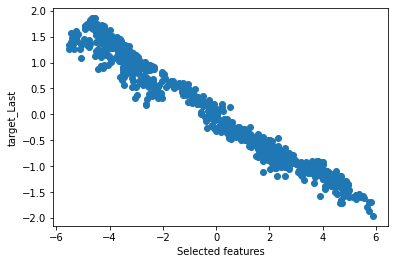

In [51]:
plt.scatter(PCAX1,T1)
plt.xlabel("Selected features")
plt.ylabel(target)

##### USING ALL AVAILABLE FEATURES

In [52]:
X2 = X.values
T2 = Y[target].values

In [53]:
X2_train,X2_test,T2_train,T2_test = train_test_split(X2,T2,train_size=0.8)

In [54]:
rf2 = RandomForestRegressor(n_estimators=10)

In [55]:
rf2.fit(X2_train,T2_train)

RandomForestRegressor(n_estimators=10)

In [56]:
preds2 = rf2.predict(X2_test) 

In [57]:
mean_squared_error(T2_test,preds2)

0.002608954926772512

In [58]:
pca2 = PCA(n_components=1)
PCAX2 = pca1.fit_transform(X2)

Text(0, 0.5, 'target_Last')

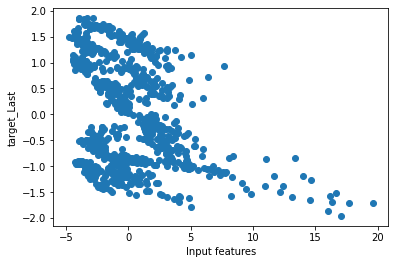

In [59]:
plt.scatter(PCAX2,T2)
plt.xlabel("Input features")
plt.ylabel(target)

######  HERE IT CAN BE SEEN THAT IF WE USE ONLY THE EXTRACTED (CORRELATED) FEATURES, THE ERROR WILL BE LESS. ON CONTRAST USING ALL FEATURES FROM THE FEATURE SPACE, ERROR RISES.
###### ALSO LOOKING AT THE GRAPHS, THERE IS NO SUCH EXPLAINABLE RELATIONS BETWEEN TARGET AND FEATURE VARIABLES

# 2. Wrapper Methods 

“Wrapper feature selection methods create many models with various different subsets of the input features and select those features that result in the best performing model according to some performance metric.” 

### Recursive Feature Elimination (RFE)

In [60]:
# defining model to build
lin_reg = LinearRegression()

# create the RFE model
rfe = RFE(lin_reg)
rfe.fit(X, Y)


# summarize the selection of the attributes
selected_features = [feature for feature, rank in zip(X.columns.values, rfe.ranking_) if rank==1]
print(f"Number of selected features: {rfe.n_features_}\n\n\
Mask: {rfe.support_}\n\n\
Selected Features:", selected_features ,"\n")

Number of selected features: 30

Mask: [ True  True  True  True  True False False  True  True  True  True  True
  True  True  True False  True  True  True  True  True  True False False
  True False  True False False False False False  True  True False  True
 False False False  True False False False False False False False False
  True  True  True  True False False False False False  True False False]

Selected Features: ['target_Open', 'target_High', 'target_Low', 'target_Change', 'target_%Chg', 'CMBO Open', 'CMBO High', 'CMBO Low', 'CMBO Last', 'CMBO Change', 'CMBO %Chg', 'DXY Price', 'DXY Open', 'DXY Low', 'DXY Change %', 'GLD Open', 'GLD High', 'GLD Low', 'GLD Last', 'GLD Volume', 'SPY IV Rank', 'TLT Open', 'TLT High', 'TLT Last', 'TLT Imp Vol', 'VIX High', 'VIX Low', 'VIX Last', 'VIX Change', 'GLD Options Vol'] 



##### RFE : IT is a class by sklearn that is reffered to as "Recursive Feature Elimination";

    It eliminates the features if it singly or in combination with other feautures does not impact the target variable ang good 

**It gives a ranking for te features to select: like feature with rank is of the highest priority**

### TESTING WRAPPER METHODS

##### using all available features

In [61]:
X_W = X.values
T_W = Y.values

In [62]:
X_W_train,X_W_test,T_W_train,T_W_test = train_test_split(X_W,T_W,train_size=0.8)

In [63]:
param_grid_W = {'max_depth': [3, 5, 10],
              'min_samples_split': [2, 5, 10], 'n_estimators' : [20,40]}

In [64]:
rf_W = RandomForestRegressor(random_state=0)

In [65]:
sh_W = HalvingGridSearchCV(rf_W, param_grid_W, cv=5,
                         factor=2).fit(X_W, T_W)

/home/huda/.local/lib/python3.8/site-packages/sklearn/model_selection/_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/home/huda/.local/lib/python3.8/site-packages/sklearn/model_selection/_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/home/huda/.local/lib/python3.8/site-packages/sklearn/model_selection/_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/home/huda/.local/lib/python3.8/site-packages/sklearn/model_selection/_validation.py:680: DataConversionWarning: A column

/home/huda/.local/lib/python3.8/site-packages/sklearn/model_selection/_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/home/huda/.local/lib/python3.8/site-packages/sklearn/model_selection/_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/home/huda/.local/lib/python3.8/site-packages/sklearn/model_selection/_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/home/huda/.local/lib/python3.8/site-packages/sklearn/model_selection/_validation.py:680: DataConversionWarning: A column

/home/huda/.local/lib/python3.8/site-packages/sklearn/model_selection/_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/home/huda/.local/lib/python3.8/site-packages/sklearn/model_selection/_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/home/huda/.local/lib/python3.8/site-packages/sklearn/model_selection/_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/home/huda/.local/lib/python3.8/site-packages/sklearn/model_selection/_validation.py:680: DataConversionWarning: A column

/home/huda/.local/lib/python3.8/site-packages/sklearn/model_selection/_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/home/huda/.local/lib/python3.8/site-packages/sklearn/model_selection/_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/home/huda/.local/lib/python3.8/site-packages/sklearn/model_selection/_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/home/huda/.local/lib/python3.8/site-packages/sklearn/model_selection/_validation.py:680: DataConversionWarning: A column

/home/huda/.local/lib/python3.8/site-packages/sklearn/model_selection/_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/home/huda/.local/lib/python3.8/site-packages/sklearn/model_selection/_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/home/huda/.local/lib/python3.8/site-packages/sklearn/model_selection/_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/home/huda/.local/lib/python3.8/site-packages/sklearn/model_selection/_validation.py:680: DataConversionWarning: A column

/home/huda/.local/lib/python3.8/site-packages/sklearn/model_selection/_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/home/huda/.local/lib/python3.8/site-packages/sklearn/model_selection/_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/home/huda/.local/lib/python3.8/site-packages/sklearn/model_selection/_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/home/huda/.local/lib/python3.8/site-packages/sklearn/model_selection/_validation.py:680: DataConversionWarning: A column

/home/huda/.local/lib/python3.8/site-packages/sklearn/model_selection/_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/home/huda/.local/lib/python3.8/site-packages/sklearn/model_selection/_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/home/huda/.local/lib/python3.8/site-packages/sklearn/model_selection/_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/home/huda/.local/lib/python3.8/site-packages/sklearn/model_selection/_validation.py:680: DataConversionWarning: A column

In [66]:
sh_W.best_estimator_

RandomForestRegressor(max_depth=10, n_estimators=40, random_state=0)

In [67]:
rf_W = RandomForestRegressor(max_depth=10, min_samples_split=5, n_estimators=40,
                      random_state=0)

In [68]:
rf_W.fit(X_W_train,T_W_train)

/tmp/ipykernel_5160/6791770.py:1: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  rf_W.fit(X_W_train,T_W_train)


RandomForestRegressor(max_depth=10, min_samples_split=5, n_estimators=40,
                      random_state=0)

In [69]:
preds_W = rf_W.predict(X_W_test) 

In [70]:
mean_squared_error(T_W_test,preds_W)

0.0011890744608722274

##### using only selected features given by RFE 

In [71]:
X_WT = X[selected_features].values
T_WT = Y.values

X_WT_train,X_WT_test,T_WT_train,T_WT_test = train_test_split(X_WT,T_WT,train_size=0.8)

In [72]:
sh_WT = HalvingGridSearchCV(RandomForestRegressor(random_state=0), param_grid_W, cv=5,
                         factor=2).fit(X_WT, T_WT)
sh_WT.best_estimator_

/home/huda/.local/lib/python3.8/site-packages/sklearn/model_selection/_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/home/huda/.local/lib/python3.8/site-packages/sklearn/model_selection/_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/home/huda/.local/lib/python3.8/site-packages/sklearn/model_selection/_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/home/huda/.local/lib/python3.8/site-packages/sklearn/model_selection/_validation.py:680: DataConversionWarning: A column

/home/huda/.local/lib/python3.8/site-packages/sklearn/model_selection/_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/home/huda/.local/lib/python3.8/site-packages/sklearn/model_selection/_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/home/huda/.local/lib/python3.8/site-packages/sklearn/model_selection/_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/home/huda/.local/lib/python3.8/site-packages/sklearn/model_selection/_validation.py:680: DataConversionWarning: A column

/home/huda/.local/lib/python3.8/site-packages/sklearn/model_selection/_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/home/huda/.local/lib/python3.8/site-packages/sklearn/model_selection/_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/home/huda/.local/lib/python3.8/site-packages/sklearn/model_selection/_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/home/huda/.local/lib/python3.8/site-packages/sklearn/model_selection/_validation.py:680: DataConversionWarning: A column

/home/huda/.local/lib/python3.8/site-packages/sklearn/model_selection/_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/home/huda/.local/lib/python3.8/site-packages/sklearn/model_selection/_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/home/huda/.local/lib/python3.8/site-packages/sklearn/model_selection/_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/home/huda/.local/lib/python3.8/site-packages/sklearn/model_selection/_validation.py:680: DataConversionWarning: A column

/home/huda/.local/lib/python3.8/site-packages/sklearn/model_selection/_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/home/huda/.local/lib/python3.8/site-packages/sklearn/model_selection/_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/home/huda/.local/lib/python3.8/site-packages/sklearn/model_selection/_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/home/huda/.local/lib/python3.8/site-packages/sklearn/model_selection/_validation.py:680: DataConversionWarning: A column

/home/huda/.local/lib/python3.8/site-packages/sklearn/model_selection/_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/home/huda/.local/lib/python3.8/site-packages/sklearn/model_selection/_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/home/huda/.local/lib/python3.8/site-packages/sklearn/model_selection/_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/home/huda/.local/lib/python3.8/site-packages/sklearn/model_selection/_validation.py:680: DataConversionWarning: A column

/home/huda/.local/lib/python3.8/site-packages/sklearn/model_selection/_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/home/huda/.local/lib/python3.8/site-packages/sklearn/model_selection/_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/home/huda/.local/lib/python3.8/site-packages/sklearn/model_selection/_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/home/huda/.local/lib/python3.8/site-packages/sklearn/model_selection/_validation.py:680: DataConversionWarning: A column

RandomForestRegressor(max_depth=5, n_estimators=40, random_state=0)

In [73]:
rf_WT = RandomForestRegressor(max_depth=10, n_estimators=40, random_state=0)
rf_WT.fit(X_WT_train,T_WT_train)

/tmp/ipykernel_5160/2164059727.py:2: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  rf_WT.fit(X_WT_train,T_WT_train)


RandomForestRegressor(max_depth=10, n_estimators=40, random_state=0)

In [74]:
preds_WT = rf_WT.predict(X_WT_test)
mean_squared_error(T_WT_test,preds_WT)

0.0007851801535475882

'''
Using selected features gives less error as compared to using all available features from feature space
'''

## RFE USING TREE ESTIMATORS

In [75]:
from sklearn.tree import DecisionTreeRegressor
from sklearn.pipeline import Pipeline
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import RepeatedKFold

In [76]:
tree_reg = DecisionTreeRegressor()

# create the RFE model
rfe = RFE(tree_reg)
rfe.fit(X, Y)


# summarize the selection of the attributes
selected_features = [feature for feature, rank in zip(X.columns.values, rfe.ranking_) if rank==1]
print(f"Number of selected features: {rfe.n_features_}\n\n\
Mask: {rfe.support_}\n\n\
Selected Features:", selected_features ,"\n")

Number of selected features: 30

Mask: [ True  True  True  True  True  True  True False False False  True  True
  True  True False False False  True False  True False  True  True False
  True False False False  True  True  True False False False False  True
 False False  True False  True False False  True  True  True  True False
 False False False  True False  True  True False False False False  True]

Selected Features: ['target_Open', 'target_High', 'target_Low', 'target_Change', 'target_%Chg', 'target_Volume', 'RSI', 'CMBO Last', 'CMBO Change', 'CMBO %Chg', 'DXY Price', 'DXY Change %', 'GLD High', 'GLD Last', 'GLD Change', 'GLD Volume', 'SPY Put/Call Vol', 'SPY Options Vol', 'SPY Put/Call OI', 'TLT Last', 'TLT Volume', 'TLT 1D IV Chg', 'TLT Put/Call Vol', 'TLT Options Vol', 'TLT Put/Call OI', 'TLT Total OI', 'VIX Change', 'GLD Imp Vol', 'GLD IV Rank', 'GLD Total OI'] 



In [77]:
selected_features

['target_Open',
 'target_High',
 'target_Low',
 'target_Change',
 'target_%Chg',
 'target_Volume',
 'RSI',
 'CMBO Last',
 'CMBO Change',
 'CMBO %Chg',
 'DXY Price',
 'DXY Change %',
 'GLD High',
 'GLD Last',
 'GLD Change',
 'GLD Volume',
 'SPY Put/Call Vol',
 'SPY Options Vol',
 'SPY Put/Call OI',
 'TLT Last',
 'TLT Volume',
 'TLT 1D IV Chg',
 'TLT Put/Call Vol',
 'TLT Options Vol',
 'TLT Put/Call OI',
 'TLT Total OI',
 'VIX Change',
 'GLD Imp Vol',
 'GLD IV Rank',
 'GLD Total OI']

In [78]:
def get_featureSpace_by_RFE(X,Y):
    tree_reg = DecisionTreeRegressor()

    # create the RFE model
    rfe = RFE(tree_reg)
    rfe.fit(X, Y)
    
    selected_features = [feature for feature, rank in zip(X.columns.values, rfe.ranking_) if rank==1]
    
    return selected_features

In [79]:
RFE_selection = get_featureSpace_by_RFE(X,Y)

In [80]:
X[RFE_selection]

,target_Open,target_High,target_Low,target_Change,target_%Chg,RSI,CMBO Last,CMBO Change,CMBO %Chg,DXY Change %,...,TLT Options Vol,TLT Put/Call OI,TLT Total OI,VIX High,VIX Change,VIX %Chg,GLD Imp Vol,GLD IV Rank,GLD Put/Call Vol,GLD Total OI
0,0.453751,0.450964,0.461522,-1.010351,-0.573600,0.038276,0.245489,-0.742409,-0.485672,0.031048,...,4.022133,-1.853642,2.802145,0.473972,0.004608,-0.452381,0.486191,-0.251761,0.825879,1.714926
1,0.585799,0.596086,0.561658,-0.993104,-0.573248,0.038276,0.314367,-1.100919,-0.491054,0.162902,...,-0.045796,-1.796094,2.824240,0.320546,0.037345,-0.407447,0.748413,0.046011,5.555864,1.476708
2,0.608406,0.599673,0.596789,0.296090,-0.113603,0.038276,0.416643,0.368435,0.110508,-0.390885,...,0.673913,-1.774365,2.732628,0.384137,-0.461899,-0.474224,0.271255,-0.494704,0.019216,1.420398
3,0.718596,0.702797,0.608799,-3.879777,-0.610945,0.038276,0.382037,-4.344495,-0.539492,3.591111,...,4.772434,-1.570298,2.923843,0.443690,1.383669,1.595715,0.148742,-0.633337,2.250895,1.319426
4,0.732220,0.768707,0.767035,1.313648,1.260397,0.038276,0.690989,1.518617,1.894279,-1.709427,...,0.570242,-1.501862,2.980586,-0.018607,-0.343227,-0.473355,-0.094135,-0.907038,-0.099798,1.273581
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
852,-1.098790,-1.119815,-1.108081,-0.016507,-0.536373,1.520561,-0.728424,-0.025836,-0.474292,1.455073,...,-1.003454,-0.965118,-0.032115,-0.424379,-0.097696,-0.470137,-0.861456,0.531897,-0.712943,-1.098849
853,-1.156281,-1.124747,-1.130450,1.266219,2.011987,1.513313,-0.726300,1.794428,2.832297,-0.048064,...,-1.027983,-1.315905,-0.173098,-0.322431,-1.513587,-0.493372,-0.842112,0.600545,1.770442,-0.661698
854,-1.172001,-1.181241,-1.157023,-0.361442,-0.566436,0.712834,-0.893748,-0.467492,-0.482289,-0.469998,...,-0.833309,-0.945784,-0.069735,-0.087245,-0.011761,-0.468397,-0.695955,1.130116,-0.207008,-0.650103
855,-1.153736,-1.180494,-1.185998,0.787622,1.072499,0.877437,-0.850480,1.152061,1.663619,1.929748,...,-0.489818,-1.039685,0.027634,0.307424,-1.509495,-0.489618,-0.743241,0.957159,1.020306,-0.706009


# feature selection using f_regression / ANOVA TEST 
 ### BASED ON P-VALUE STATISTICS

In [81]:
from sklearn.feature_selection import f_regression

##### f_regression is recommended as a feature selection criterion to identify potentially predictive feature for a downstream classifier, irrespective of the sign of the association with the target variable.

In [82]:
'''
    @Input :
        df : dataframe containing the feature variables
        Y  : dataframe containing the target variables
    
    @description :
    This function wil perform anova test between every target variable and features set seperately;
    
    @Returns : a dictionery with keys being the target variables, and to every key a list is associated;
              which contains the names of all features that are related to target through p-value stats.
    
'''
def extract_feature_using_Anova(df,Y):
    # dictionery to return with target variables as keys and list of features as values
    result = {} 
    
    # for every target variable in the Y dataframe;
    for i in Y.columns:
        
        #list to store fatures for specific target variable
        result[i] = [] 
        
        X = df.values
        y = Y[i].values
        
        #f_regression is recommended as a feature selection criterion to identify 
        #potentially predictive feature for a downstream classifier, 
        #irrespective of the sign of the association with the target variable
        fRegression = f_regression(X,y)
        
        #getting p_values
        f_stats = fRegression[1]
        
        #creating a pandas series
        relevant_features = pd.Series(f_stats , index=df.columns)

        # extracting relevant features with p-value is greater then 0.4
        relevant_features = relevant_features[relevant_features>0.4]
        
        #removing any target variables if coes under correlated features set
        relevant_features = [i for i in list(relevant_features.index) if i not in list(Y.columns)]
        
        #loop to append those highly corelatted features to the list of features
        for x in relevant_features: 
            result[i].append(x)
        result
    return result

In [83]:
selected_features_ANOVA = extract_feature_using_Anova(X,Y)

In [84]:
target = "target_%Chg"
feats = []
for k in selected_features_ANOVA:
    if k == target:
        feats = selected_features_ANOVA[k]

In [85]:
for k in selected_features_ANOVA:
    print("For predicting ",k," the effective features might be:")
    for i in selected_features_ANOVA[k]:
        print("\t - ",i)

For predicting  target_Last  the effective features might be:
	 -  TLT IV Rank
	 -  TLT IV Pctl
	 -  VIX Change
	 -  VIX %Chg


# NOTE:

    - P-VALUES TELLS US WHETHER NULL HYPOTESIS IS CORRECT OR NOT.
    - NULL HYPTHESIS : The target variable and feature variables are not related at all.
    - ALTERNATE HYPOTHESIS : The target variable and feature variables are related by some relation.
    - if p-values is greater than certain threshold, NULL HYPOTHESIS will be rejected.
    - Hence after a hit and trial a threshold value of 0.4 is selected.
    - If p-value for certain feature is greater than 0.4, it means that target variable is dependant on that.

# GETTING DESIRED DATAFRAMES: 

X -> feature space

Y -> target variables

## 1. using RFE Approach:

In [86]:
RFE_selection = get_featureSpace_by_RFE(X,Y)

In [89]:
RFE_selection

['target_Open',
 'target_High',
 'target_Low',
 'target_Change',
 'target_%Chg',
 'target_Volume',
 'RSI',
 'CMBO Last',
 'CMBO Change',
 'CMBO %Chg',
 'DXY Change %',
 'GLD High',
 'GLD Low',
 'GLD Change',
 'GLD Volume',
 'SPY Put/Call Vol',
 'SPY Options Vol',
 'SPY Put/Call OI',
 'TLT Last',
 'TLT Change',
 'TLT Volume',
 'TLT Put/Call Vol',
 'TLT Options Vol',
 'TLT Put/Call OI',
 'TLT Total OI',
 'VIX Change',
 'VIX %Chg',
 'GLD Imp Vol',
 'GLD IV Rank',
 'GLD Total OI']

In [92]:
dataframe_of_selected_features = df[RFE_selection]
rfe_extracted_data = dataframe_of_selected_features.join(df[["target_Last"]]) 

In [93]:
rfe_extracted_data.head(2)

,target_Open,target_High,target_Low,target_Change,target_%Chg,target_Volume,RSI,CMBO Last,CMBO Change,CMBO %Chg,...,TLT Put/Call Vol,TLT Options Vol,TLT Put/Call OI,TLT Total OI,VIX Change,VIX %Chg,GLD Imp Vol,GLD IV Rank,GLD Total OI,target_Last
2022-09-16,384.14,386.25,382.11,-4.56,-0.0117,103084800,45.190355,2143.26,-16.54,-0.0077,...,0.601567,362843,0.467713,2370678,0.03,0.11,0.1712,0.2482,3508412,385.56
2022-09-15,392.96,395.96,388.78,-4.48,-0.0114,87633800,45.190355,2159.80,-24.56,-0.0112,...,0.902025,99824,0.492690,2380475,0.11,0.42,0.1834,0.3150,3341351,390.12


In [95]:
rfe_extracted_data.set_index(df.index,inplace=True)

In [96]:
rfe_extracted_data.to_csv("spy.csv")

## 2. Using ANOVA/p-stats

In [90]:
ANOVA_selection = extract_feature_using_Anova(X,Y)

In [91]:
resultant_dfs = []
for k in ANOVA_selection:
    feats = selected_features_ANOVA[k]
    resultant_dfs.append( X[feats].join(Y) )

In [92]:
resultant_dfs[0]

,TLT IV Rank,TLT IV Pctl,VIX Change,VIX %Chg,target_Last
0,1.012622,0.440060,0.004608,-0.452381,0.474400
1,0.753077,0.297031,0.037345,-0.407447,0.542672
2,0.704968,0.261274,-0.461899,-0.474224,0.609747
3,1.047794,0.475818,1.383669,1.595715,0.587289
4,0.998472,0.368546,-0.343227,-0.473355,0.789410
...,...,...,...,...,...
852,-0.119351,0.261274,-0.097696,-0.470137,-1.099298
853,-0.363130,-0.132056,-1.513587,-0.493372,-1.100047
854,-0.038900,0.404303,-0.011761,-0.468397,-1.189878
855,0.011230,0.404303,-1.509495,-0.489618,-1.166672


### 3. Using pERSON Correlation

In [93]:
PEASON_selection = extract_feature_relevance_to_targets(X,Y)

In [94]:
resultant_dfs_CORR = []
for k in PEASON_selection:
    feats = PEASON_selection[k]
    resultant_dfs_CORR.append( X[feats].join(Y) )

In [95]:
resultant_dfs_CORR[0]

,target_Open,target_High,target_Low,CMBO Open,CMBO High,CMBO Low,CMBO Last,GLD Open,GLD High,GLD Low,GLD Last,SPY Options Vol,SPY Put/Call OI,SPY Total OI,TLT Total OI,target_Last
0,0.453751,0.450964,0.461522,0.205398,0.218239,0.220093,0.245489,-0.067239,-0.006852,-0.047261,-0.009054,3.787102,-0.159866,2.044280,2.802145,0.474400
1,0.585799,0.596086,0.561658,0.378545,0.416277,0.315654,0.314367,0.034580,0.037722,-0.033553,-0.050797,2.435423,-0.455789,2.119119,2.824240,0.542672
2,0.608406,0.599673,0.596789,0.409334,0.421421,0.368162,0.416643,0.127671,0.109764,0.118700,0.092393,2.502047,-0.346219,2.019459,2.732628,0.609747
3,0.718596,0.702797,0.608799,0.600301,0.581943,0.388664,0.382037,0.117489,0.123618,0.151011,0.122002,2.891481,-0.205689,1.795044,2.923843,0.587289
4,0.732220,0.768707,0.767035,0.614482,0.682195,0.635265,0.690989,0.178096,0.170481,0.200947,0.184131,2.887669,-0.289890,1.907871,2.980586,0.789410
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
852,-1.098790,-1.119815,-1.108081,-0.734921,-0.763251,-0.702802,-0.728424,-1.947007,-1.945470,-1.939908,-1.953038,0.134966,-0.107828,0.702553,-0.032115,-1.099298
853,-1.156281,-1.124747,-1.130450,-0.732788,-0.761118,-0.700668,-0.726300,-1.917916,-1.932460,-1.934033,-1.952553,-0.934396,-2.479329,-0.929815,-0.173098,-1.100047
854,-1.172001,-1.181241,-1.157023,-0.900998,-0.929294,-0.868905,-0.893748,-1.935856,-1.935833,-1.929627,-1.942845,0.073715,-1.474038,0.645951,-0.069735,-1.189878
855,-1.153736,-1.180494,-1.185998,-0.857533,-0.885838,-0.825433,-0.850480,-1.962038,-1.975347,-1.969281,-1.980220,0.704522,0.439464,-0.072235,0.027634,-1.166672


In [96]:
# df_merged = reduce(lambda  left,right: pd.merge(left,right,on=['Date'],
#                                             how='outer'), [f1,f2,f3,f4,f5,f6,f7,f8,f9])

# SELECTING BEST METHOD: 

### When to use ANOVA selection
- Like the t-test, ANOVA helps you find out whether the differences between groups of data are statistically significant. It works by analyzing the levels of variance within the groups through samples taken from each of them.
- You might use Analysis of Variance (ANOVA) as a marketer when you want to test a particular hypothesis. You would use ANOVA to help you understand how your different groups respond, with a null hypothesis for the test that the means of the different groups are equal. If there is a statistically significant result, then it means that the two populations are unequal (or different).

In a more abstract terms, it tells how much features can affect the targeted group of values.

### When to use RFE selection
- Recursive Feature Elimination, or RFE Feature Selection, is a feature selection process that reduces a model’s complexity by choosing significant features and removing the weaker ones.
- The selection process eliminates the relevant features one by one until it has achieved the optimum number needed to assure peak performance.
- RFE ranks features by the model’s “coef” or “feature importances” attributes. It then recursively eliminates a minor number of features per loop, removing any existing dependencies and collinearities present in the model.

In short, Recursive Feature Elimination narrows down the number of features, resulting in a corresponding increase in model efficiency.

### When to use PEARSON Corelation test for feature selection
- Pearson is most appropriate for measurements taken from an interval scale.
- The assumptions of Pearson's are constant variance and linearity 

In short, it extract features that are correlated to the target variable in a linear fashion

#  NOTE:

- According to analysis and some related research, warpper methods(RECCURSIVE FEATURE ELIMINATION) might be considered to be the best approach as it will find the appropriate feature set by testing various combinations of the features to predict target value.
- It will extract features best suited for the prediction of the target variable by making small subsets of feature combination and test whether certain selected features will give required results better than any other combination and recursively selects the best subset of features.